# Climate model evaluation - bias

Absolute:
$$
z_{bias} = \frac{1}{25} \displaystyle\sum_{y=1}^{25}
(\bar{x}_y - \bar{x}_{y_{obs}})
$$

Relative:
$$
z_{bias} = \frac{1}{25} \displaystyle\sum_{y=1}^{25}
\left(\left(\bar{x}_y - \bar{x}_{y_{obs}}\right) \times 100\right)\ (\%)
$$

In [1]:
import importlib
import matplotlib.pyplot as plt
import climag.climag as cplt
import seaborn as sns
import xarray as xr
import geopandas as gpd
import os

In [ ]:
# mask for offshore areas
ie_bbox = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="ne_10m_land_2157_IE_BBOX_DIFF",
)
# mask for non-pasture areas
mask = gpd.read_file(
    os.path.join("data", "boundaries", "boundaries_all.gpkg"),
    layer="CLC_2018_MASK_PASTURE_2157_IE",
)

In [2]:
def plot_bias(dataset):
    for v in list(dataset.data_vars):
        fig = dataset[v].plot.contourf(
            x="x",
            y="y",
            col="model",
            robust=True,
            subplot_kws={"projection": cplt.projection_hiresireland},
            transform=cplt.projection_lambert_conformal,
            levels=14,
            xlim=(-1.775, 1.6),
            ylim=(-2.1, 2.1),
            cbar_kwargs={"location": "bottom", "aspect": 30},
            figsize=(12, 5),
            cmap="RdBu",
            center=0,
        )
        fig.set_titles("{value}", weight="semibold", fontsize=14)
        for axis in fig.axs.flat:
            mask.to_crs(cplt.projection_hiresireland).plot(
                ax=axis, color="white", linewidth=0
            )
            ie_bbox.to_crs(cplt.projection_hiresireland).plot(
                ax=axis,
                edgecolor="darkslategrey",
                color="white",
                linewidth=0.5,
            )
        plt.show()

In [ ]:
def ensemble_mean_bias(dataset):
    bias_mean = dataset.mean(dim="year", skipna=True)
    ds_ens = (
        bias_mean.mean(dim="model", skipna=True)
        .assign_coords(model="Ensemble")
        .expand_dims(dim="model")
    )
    bias_mean_ens = xr.merge([bias_mean, ds_ens])
    # sort models
    bias_mean_ens = bias_mean_ens.reindex(model=cplt.model_list + ["Ensemble"])
    return bias_mean_ens

In [17]:
importlib.reload(cplt)

<module 'climag.climag' from '/mnt/Backup/Documents/Git/ClimAg/ClimAg/climag/climag.py'>

In [3]:
mera = cplt.load_obs_data()

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


## EURO-CORDEX

In [8]:
ds_ec = cplt.load_all_data("EURO-CORDEX", hist_only=True)

In [13]:
ds_ec_ann, mera_ann = cplt.regrid_climate_model_data(mera, ds_ec, skipna=True)

In [18]:
bias_abs_ec, bias_rel_ec = cplt.calc_bias(mera_ann, ds_ec_ann)

In [ ]:
bias_abs_ec_mean_ens = ensemble_mean_bias(bias_abs_ec)
bias_rel_ec_mean_ens = ensemble_mean_bias(bias_rel_ec)

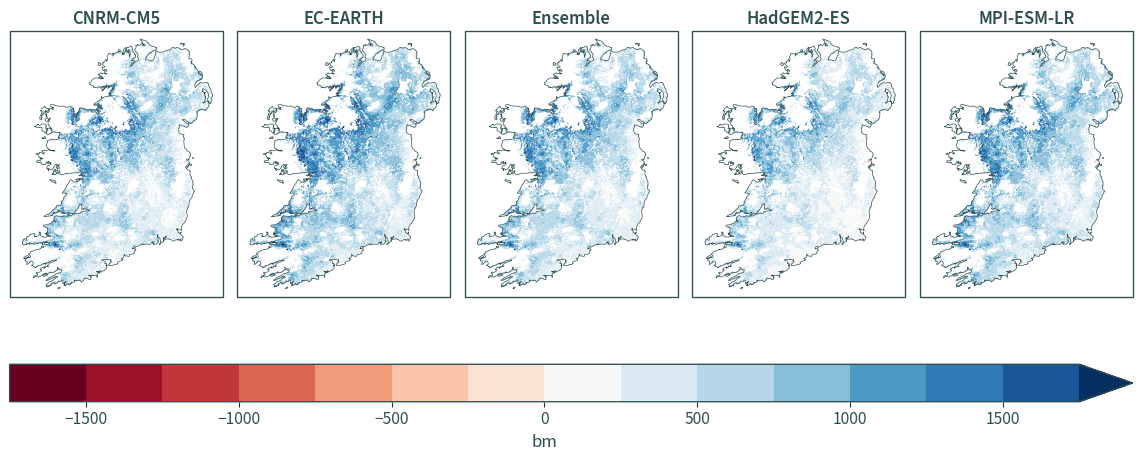

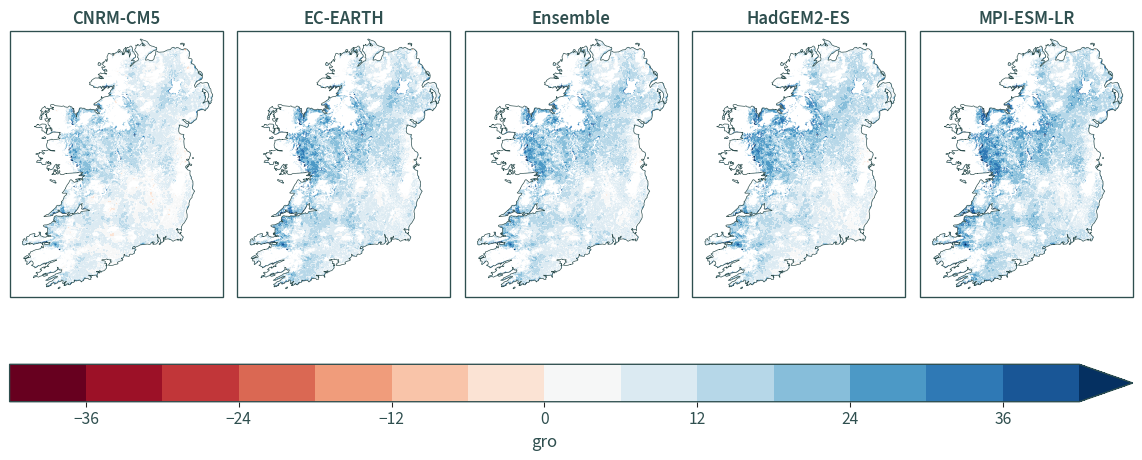

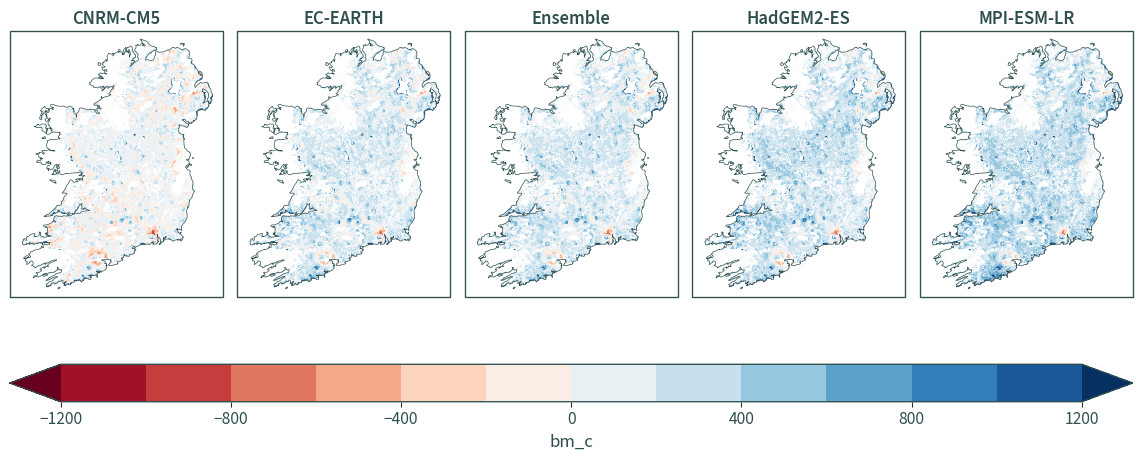

In [54]:
plot_bias(bias_abs_ec_mean_ens)

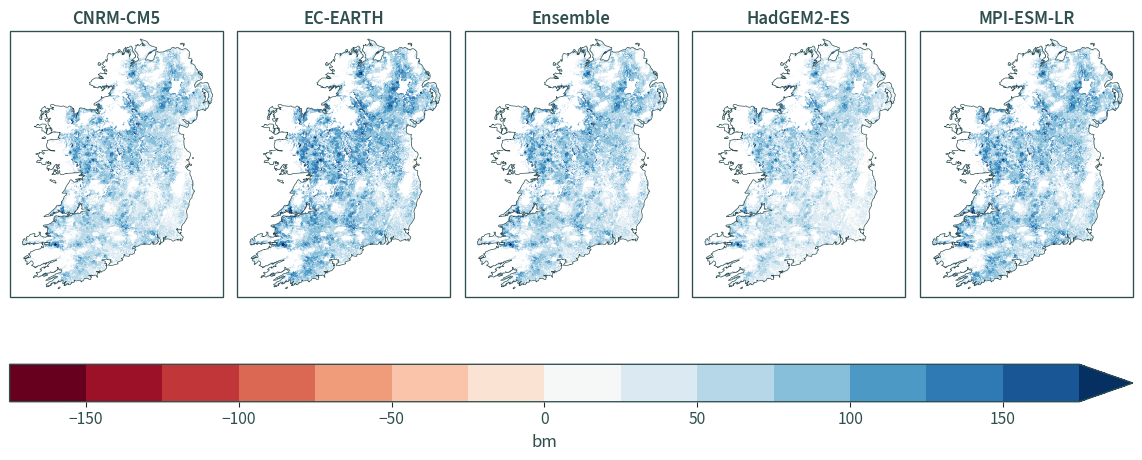

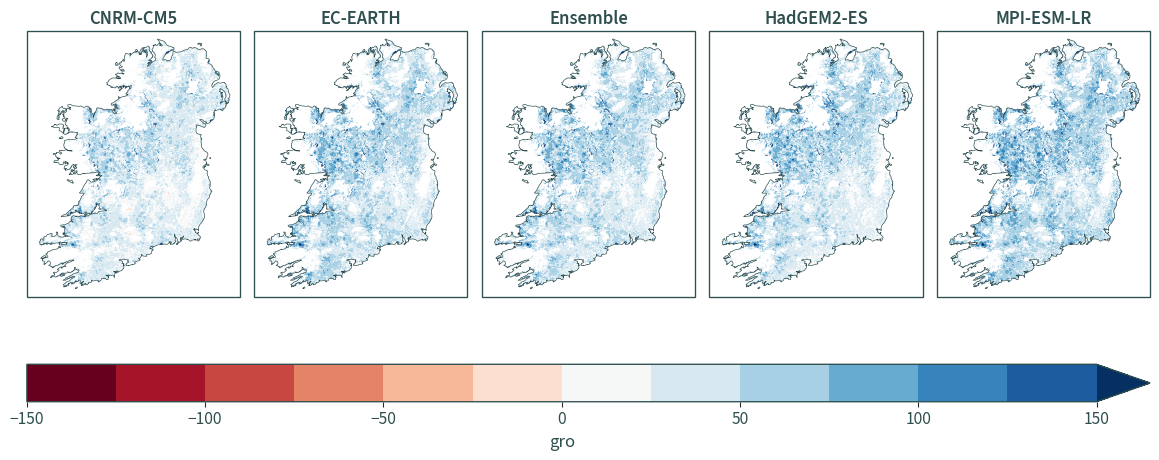

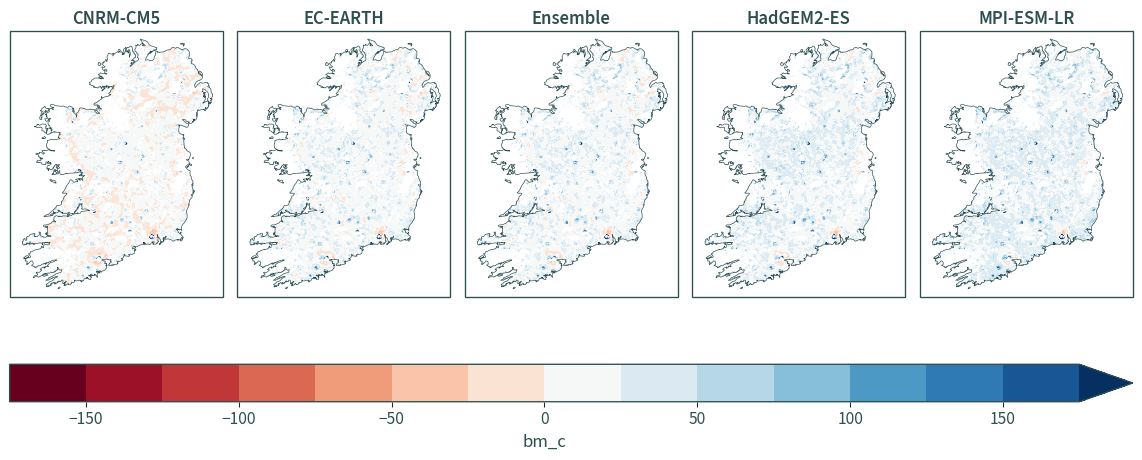

In [55]:
plot_bias(bias_rel_ec_mean_ens)

## HiResIreland

In [4]:
ds_hr = cplt.load_all_data("HiResIreland", hist_only=True)

In [5]:
ds_hr_ann, mera_ann = cplt.regrid_climate_model_data(mera, ds_hr, skipna=True)

In [6]:
bias_abs_hr, bias_rel_hr = cplt.calc_bias(mera_ann, ds_hr_ann)

In [7]:
bias_abs_hr_mean_ens = ensemble_mean_bias(bias_abs_hr)
bias_rel_hr_mean_ens = ensemble_mean_bias(bias_rel_hr)

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce

/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/mnt/Backup/Documents/Git/ClimAg/ClimAg/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


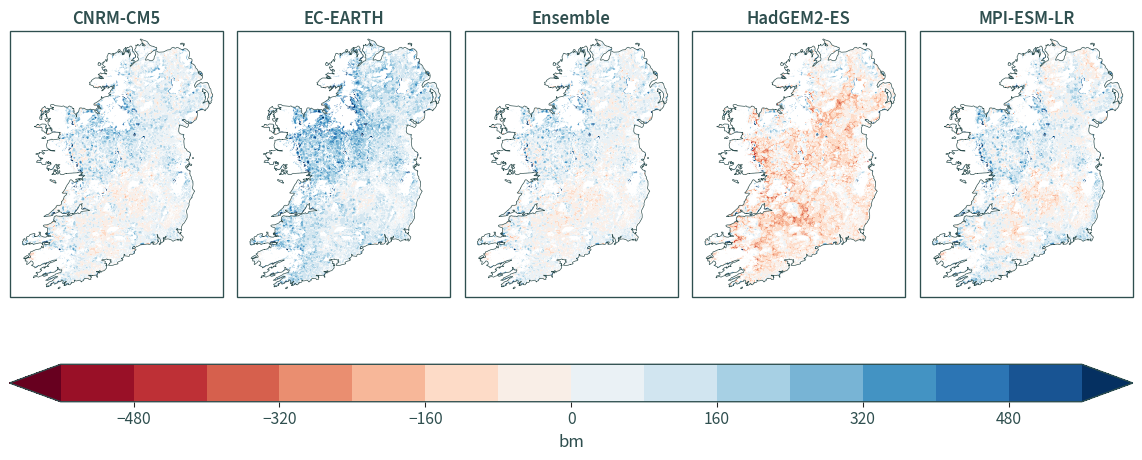

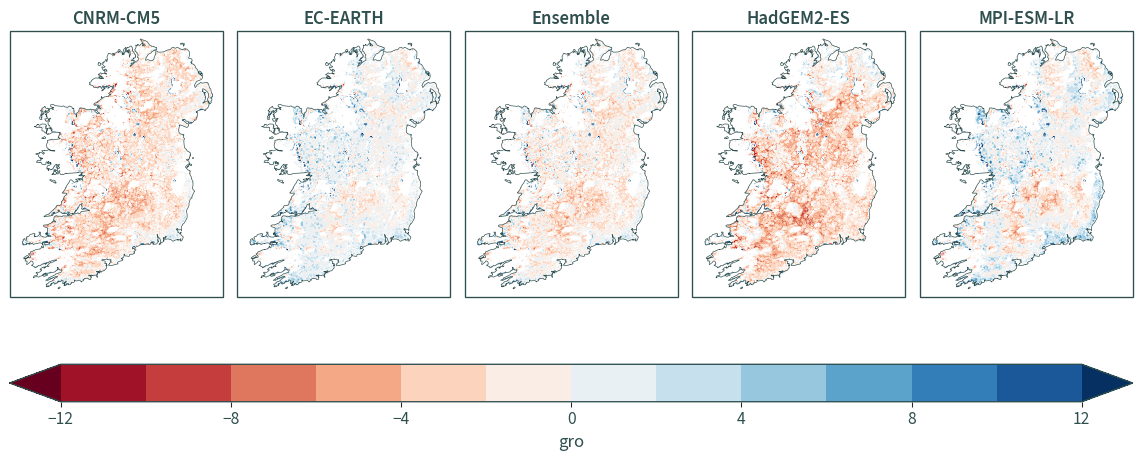

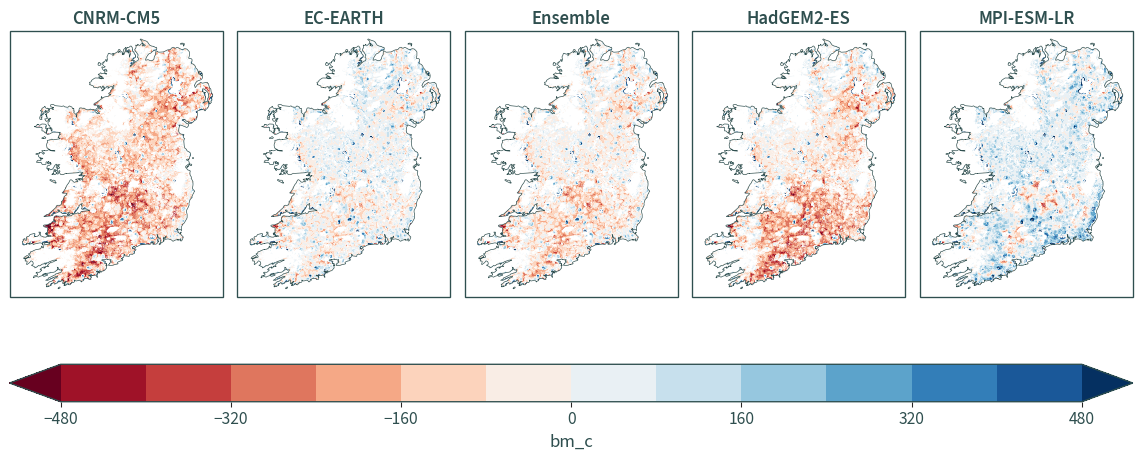

In [9]:
plot_bias(bias_abs_hr_mean_ens)

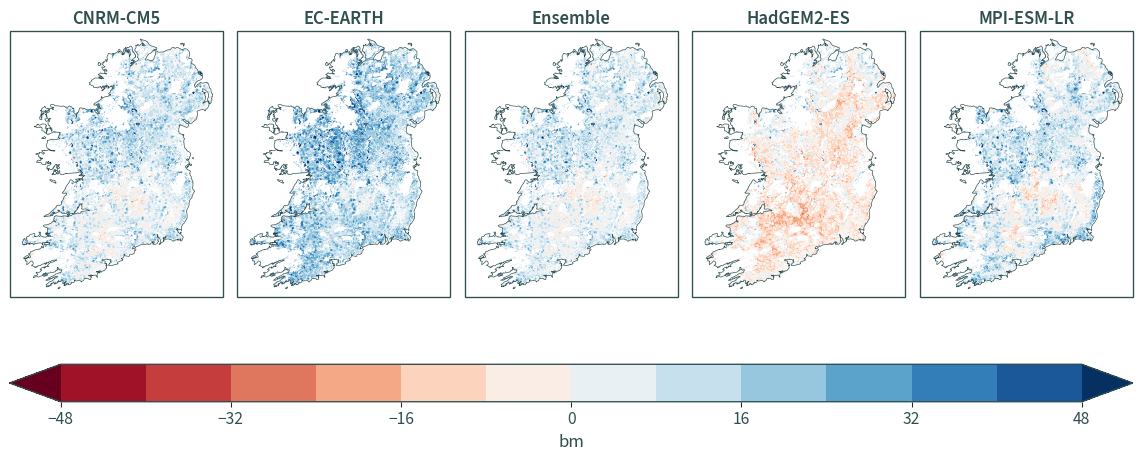

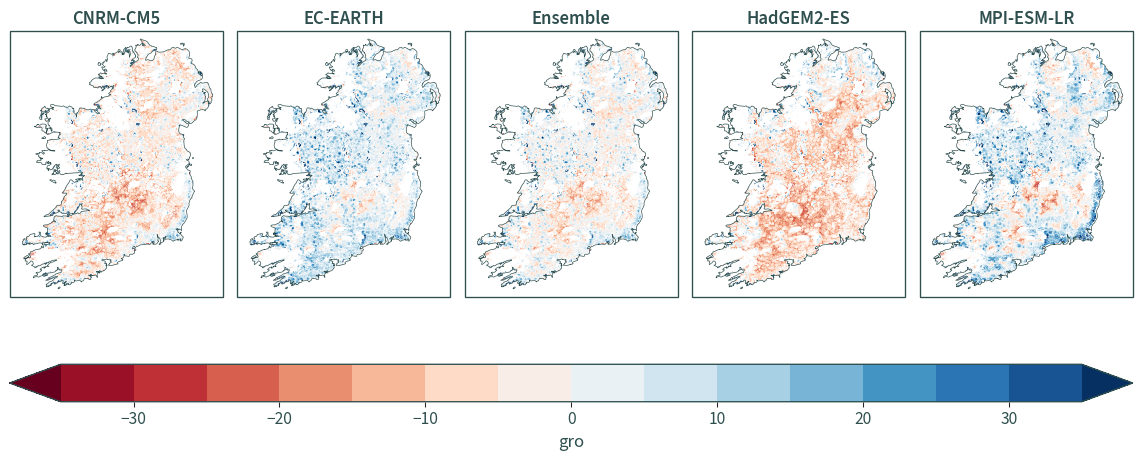

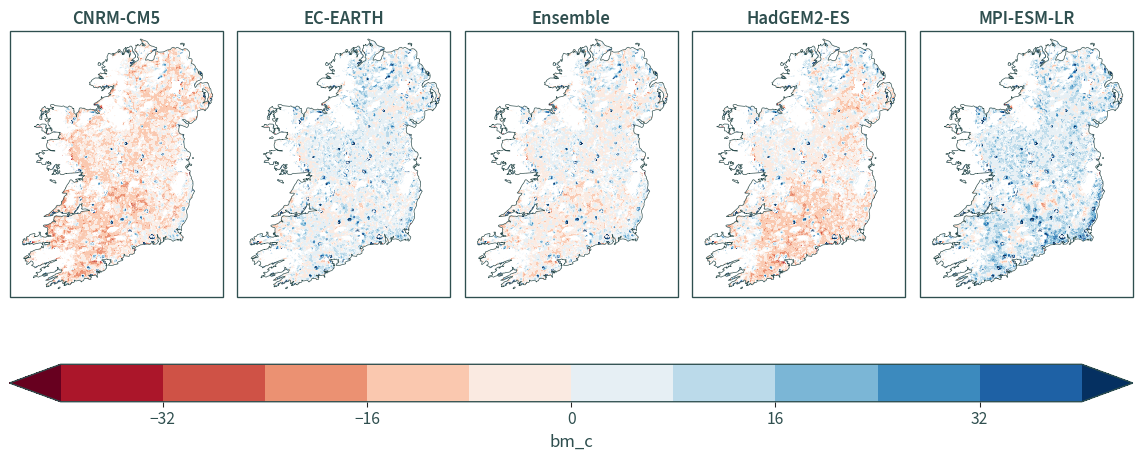

In [10]:
plot_bias(bias_rel_hr_mean_ens)